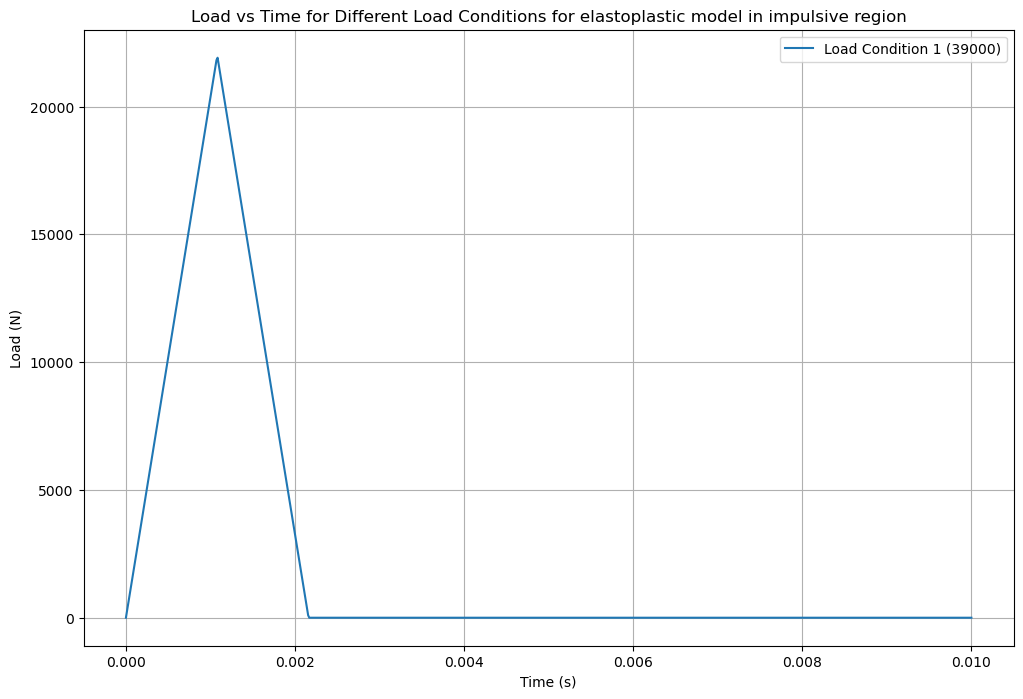

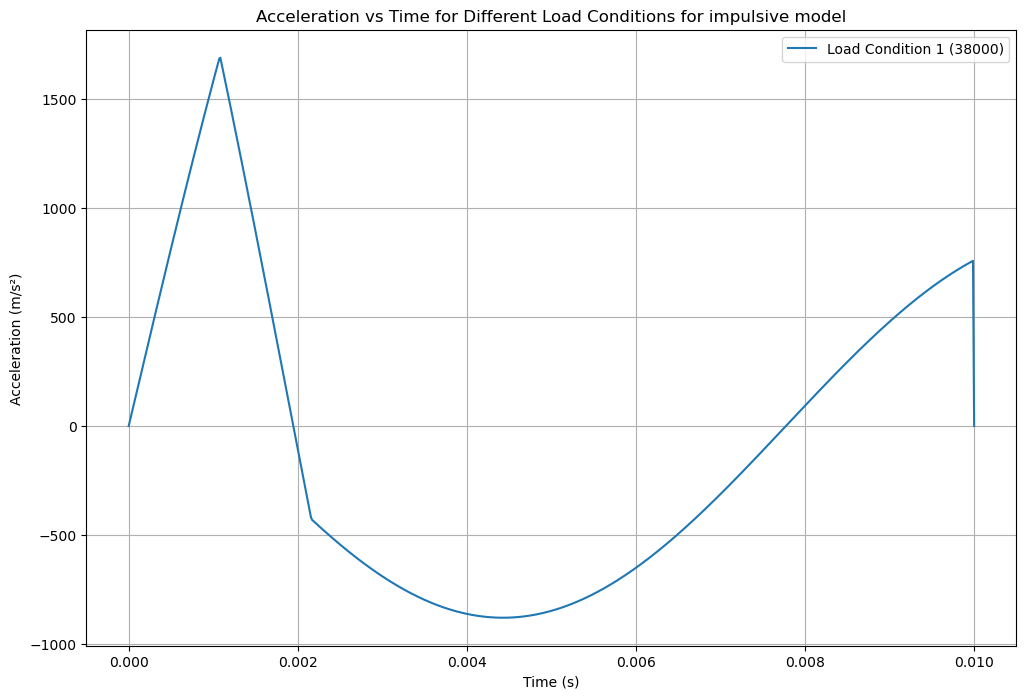

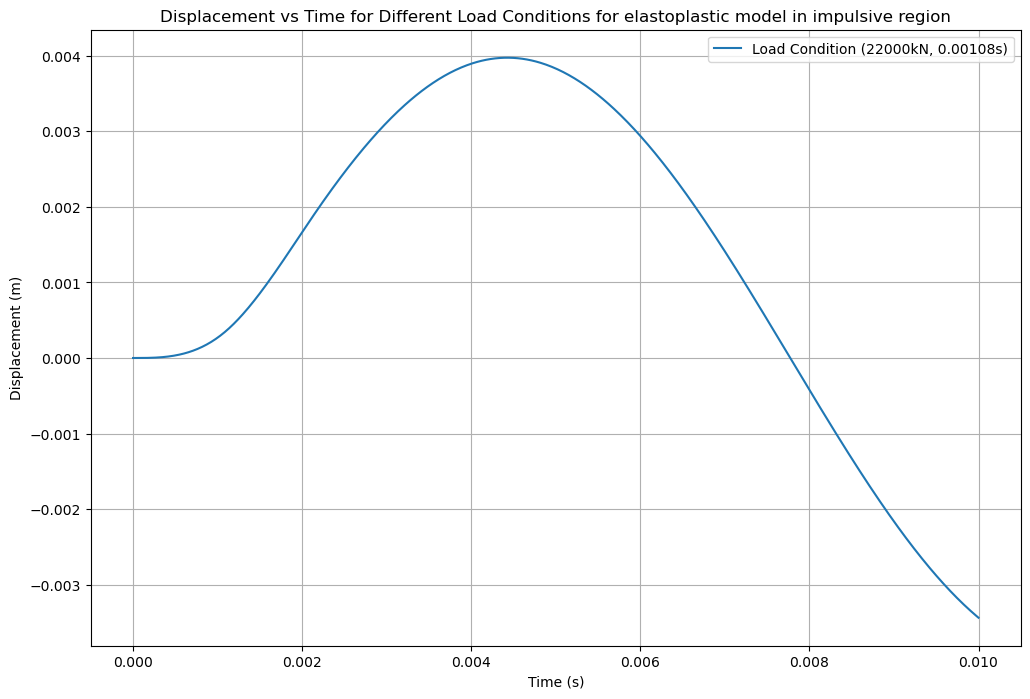

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import math

# To calculate the natural period of the system
def get_natural_period(M, k):
    return (2 * np.pi * math.sqrt(M)) / math.sqrt(k)

# To calculate the load against the time of application of load for different conditions
def get_load_value(x, max_load, rise_time, fall_time):
    if 0 <= x <= rise_time:
        return (max_load / rise_time) * x
    elif rise_time < x <= fall_time:
        return -(max_load / rise_time) * x + 2 * max_load
    else:
        return 0

# Material properties
k = 2747601        # Stiffness of the spring (N/m)
W = 121.91         # Weight of the beam (N)
M = W / 9.81       # Mass of beam (kg)
Rm = 11400-W          # Resistance (N)

# Calculation of Elastic Limit
yel = Rm / k
ym= 1.73*yel
# Calculation of natural period and time step
reduction_factor = 0.001
natural_period = get_natural_period(M, k)  # Calculate the natural period of the system

# First load condition
T1 = 0.01           # Total time (sec)
delta_t1 = natural_period * reduction_factor  # Apply reduction factor and calculate the time step delta_t
n_t_steps1 = int(T1 / delta_t1)  # Number of time steps
t1 = np.linspace(0, T1, n_t_steps1)  # Initialize the time domain

Load1 = np.array([get_load_value(x, 22000, 0.00108, 0.00108*2) for x in t1])

# Displacement and acceleration arrays
Disp1 = np.zeros(n_t_steps1)
Acc1 = np.zeros(n_t_steps1)

# Initial conditions
Disp1[0] = 0
Acc1[0] = 0
Trip1 = 0

# Displacement calculation loop
for count in range(n_t_steps1 - 1):
    if Trip1 == 0:
        if Disp1[count] < yel:
            Acc1[count] = (Load1[count] - k * Disp1[count]) / M
        elif yel < Disp1[count] <= ym:
            Acc1[count] = (Load1[count] - Rm) / M

        elif Disp1[count] > ym:
            Trip1 = 1
            Acc1[count] = (Load1[count] - Rm + k * (ym - Disp1[count])) / M
 
    elif Trip1 == 1:
        Acc1[count] = (Load1[count] - Rm + k * (ym - Disp1[count])) / M

    # Update displacement using Newmark-beta method
    if count == 0:
        Disp1[count + 1] = 0.5 * Acc1[count] * delta_t1 ** 2
    else:
        Disp1[count + 1] = 2 * Disp1[count] - Disp1[count - 1] + Acc1[count] * delta_t1 ** 2


# Plot Load vs Time
plt.figure(figsize=(12, 8))
plt.plot(t1, Load1, label='Load Condition 1 (39000)')

plt.xlabel('Time (s)')
plt.ylabel('Load (N)')
plt.title('Load vs Time for Different Load Conditions for elastoplastic model in impulsive region')
plt.legend()
plt.grid()
plt.show()

# Plot Acceleration vs Time
plt.figure(figsize=(12, 8))
plt.plot(t1, Acc1, label='Load Condition 1 (38000)')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time for Different Load Conditions for impulsive model')
plt.legend()
plt.grid()
plt.show()

# Plot Displacement vs Time
plt.figure(figsize=(12, 8))
plt.plot(t1, Disp1, label='Load Condition (22000kN, 0.00108s)')

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time for Different Load Conditions for elastoplastic model in impulsive region')
plt.legend()
plt.grid()
plt.show()


